In [2]:
import pandas as pd
df=pd.read_csv("sales_data_with_discounts.csv")
df.head()

,Date,Day,SKU,City,Volume,BU,Brand,Model,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,01-04-2021,Thursday,M01,C,15,Mobiles,RealU,RU-10,12100,181500,11.654820,21153.498820,160346.501180
1,01-04-2021,Thursday,M02,C,10,Mobiles,RealU,RU-9 Plus,10100,101000,11.560498,11676.102961,89323.897039
2,01-04-2021,Thursday,M03,C,7,Mobiles,YouM,YM-99,16100,112700,9.456886,10657.910157,102042.089843
3,01-04-2021,Thursday,M04,C,6,Mobiles,YouM,YM-99 Plus,20100,120600,6.935385,8364.074702,112235.925298
4,01-04-2021,Thursday,M05,C,3,Mobiles,YouM,YM-98,8100,24300,17.995663,4372.946230,19927.053770


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               450 non-null    object 
 1   Day                450 non-null    object 
 2   SKU                450 non-null    object 
 3   City               450 non-null    object 
 4   Volume             450 non-null    int64  
 5   BU                 450 non-null    object 
 6   Brand              450 non-null    object 
 7   Model              450 non-null    object 
 8   Avg Price          450 non-null    int64  
 9   Total Sales Value  450 non-null    int64  
 10  Discount Rate (%)  450 non-null    float64
 11  Discount Amount    450 non-null    float64
 12  Net Sales Value    450 non-null    float64
dtypes: float64(3), int64(3), object(7)
memory usage: 45.8+ KB


In [9]:
df.describe()


,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
count,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000
mean,5.066667,10453.433333,33812.835556,15.155242,3346.499424,30466.336131
std,4.231602,18079.904840,50535.074173,4.220602,4509.902963,46358.656624
min,1.000000,290.000000,400.000000,5.007822,69.177942,326.974801
25%,3.000000,465.000000,2700.000000,13.965063,460.459304,2202.208645
50%,4.000000,1450.000000,5700.000000,16.577766,988.933733,4677.788059
75%,6.000000,10100.000000,53200.000000,18.114718,5316.495427,47847.912852
max,31.000000,60100.000000,196400.000000,19.992407,25738.022194,179507.479049


In [12]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
print(numerical_cols)


['Volume', 'Avg Price', 'Total Sales Value', 'Discount Rate (%)', 'Discount Amount', 'Net Sales Value']


In [13]:
numerical_cols = ['Volume', 'Avg Price', 'Total Sales Value', 'Discount Rate (%)', 'Discount Amount', 'Net Sales Value']

numerical_stats = pd.DataFrame({
    'Mean': df[numerical_cols].mean(),
    'Median': df[numerical_cols].median(),
    'Mode': df[numerical_cols].mode().iloc[0],
    'Standard Deviation': df[numerical_cols].std()
})

display(numerical_stats)

,Mean,Median,Mode,Standard Deviation
Volume,5.066667,4.000000,3.000000,4.231602
Avg Price,10453.433333,1450.000000,400.000000,18079.904840
Total Sales Value,33812.835556,5700.000000,24300.000000,50535.074173
Discount Rate (%),15.155242,16.577766,5.007822,4.220602
Discount Amount,3346.499424,988.933733,69.177942,4509.902963
Net Sales Value,30466.336131,4677.788059,326.974801,46358.656624


Histograms of Numerical Columns:


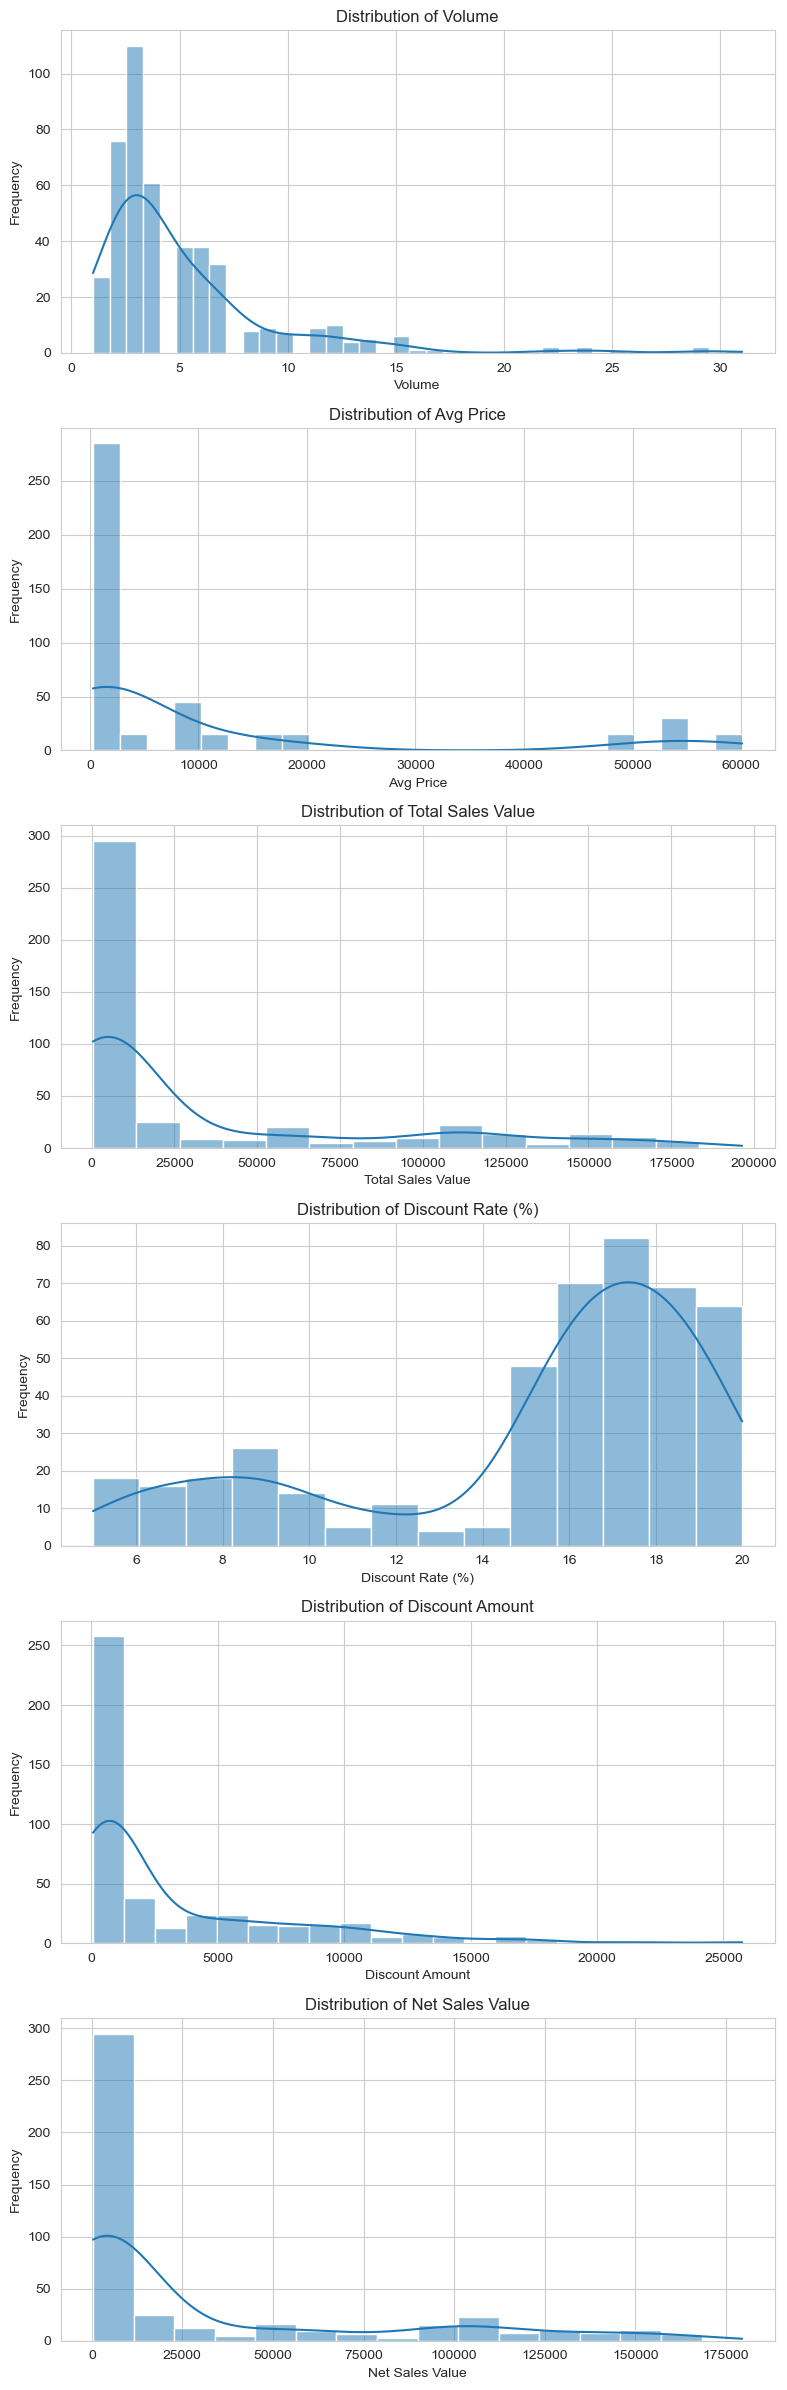

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

print("Histograms of Numerical Columns:")

# Set the style for the plots
sns.set_style("whitegrid")

# Create a figure and axes for the plots
fig, axes = plt.subplots(nrows=len(numerical_cols), ncols=1, figsize=(8,4  * len(numerical_cols)))

# Plot histograms for each numerical column
for i, col in enumerate(numerical_cols):
    sns.histplot(df[col], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

Box Plots of Numerical Columns:


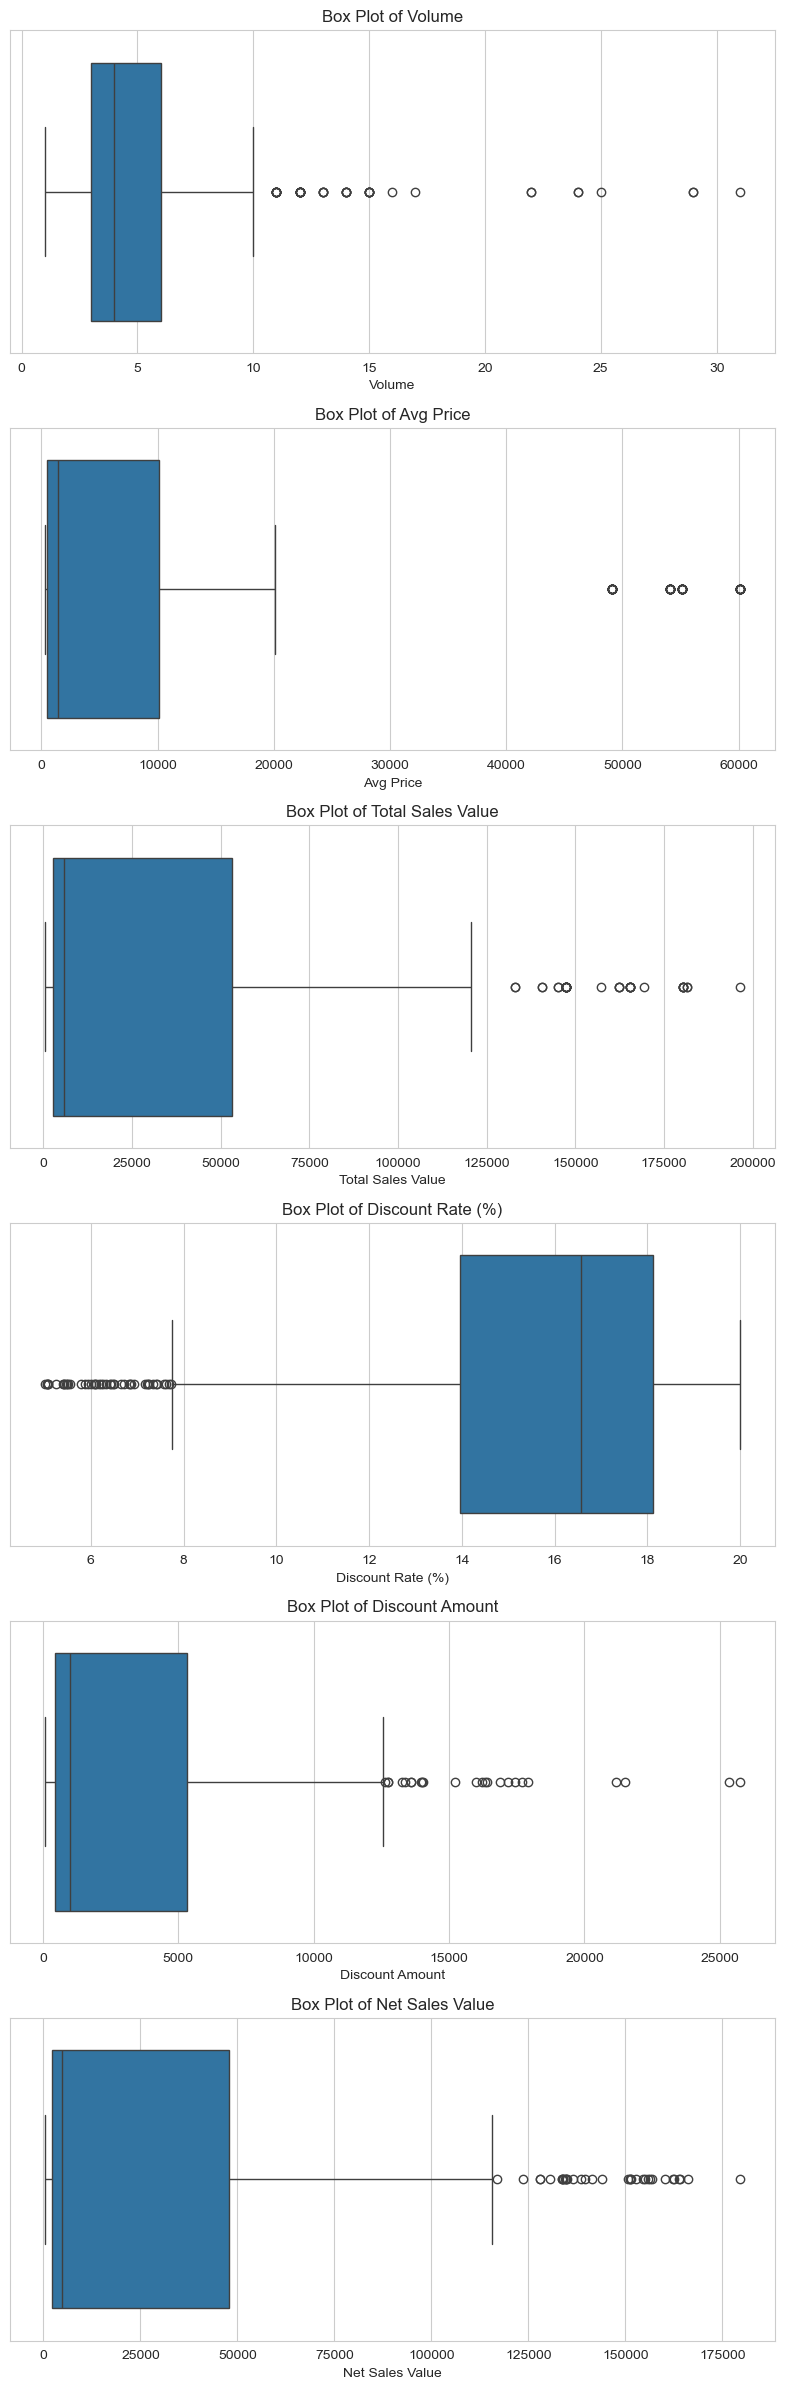

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
#identify numerical columns
Numerical_cols=df.select_dtypes(include=["int64","float64"]).columns
print("Box Plots of Numerical Columns:")

# Set the style for the plots
sns.set_style("whitegrid")

# Create a figure and axes for the plots
fig, axes = plt.subplots(nrows=len(numerical_cols), ncols=1, figsize=(8,4  * len(numerical_cols)))

# Plot box plots for each numerical column
for i, col in enumerate(numerical_cols):
    sns.boxplot(x=df[col], ax=axes[i])
    axes[i].set_title(f'Box Plot of {col}')
    axes[i].set_xlabel(col)

plt.tight_layout()
plt.show()

Bar Charts of Numerical Columns:


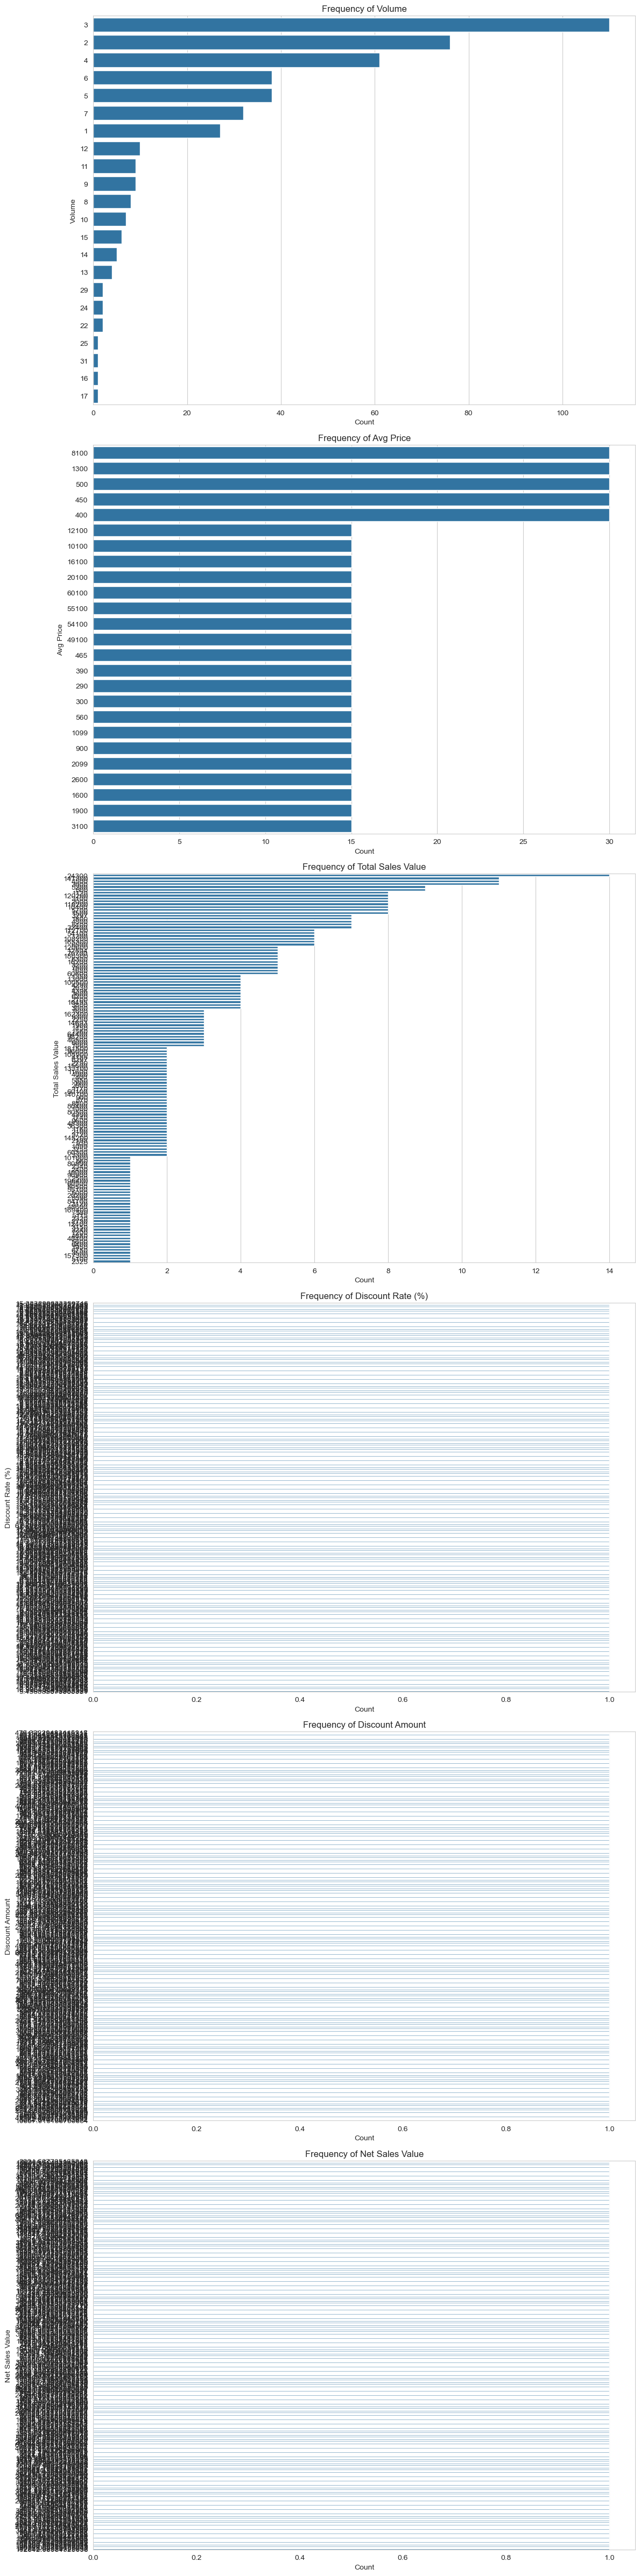

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
#identify numerical columns
Numerical_cols=df.select_dtypes(include=["int64","float64"]).columns
print("Bar Charts of Numerical Columns:")

# Set the style for the plots
sns.set_style("whitegrid")

# Create a figure and axes for the plots
fig, axes = plt.subplots(nrows=len(Numerical_cols), ncols=1, figsize=(12, 8 * len(Numerical_cols)))

# Plot bar charts for each Numerical column
for i, col in enumerate(Numerical_cols):
    sns.countplot(y=col, data=df, ax=axes[i], order=df[col].value_counts().index)
    axes[i].set_title(f'Frequency of {col}')
    axes[i].set_xlabel('Count')
    axes[i].set_ylabel(col)

plt.tight_layout()
plt.show()